In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Lấy dữ liệu S&P 500 (ký hiệu: ^GSPC)
sp500 = yf.Ticker("^GSPC")

In [3]:
# Lấy dữ liệu lịch sử  trong tháng 3
data = sp500.history(interval="1d", start="2024-04-01", end="2025-04-01")

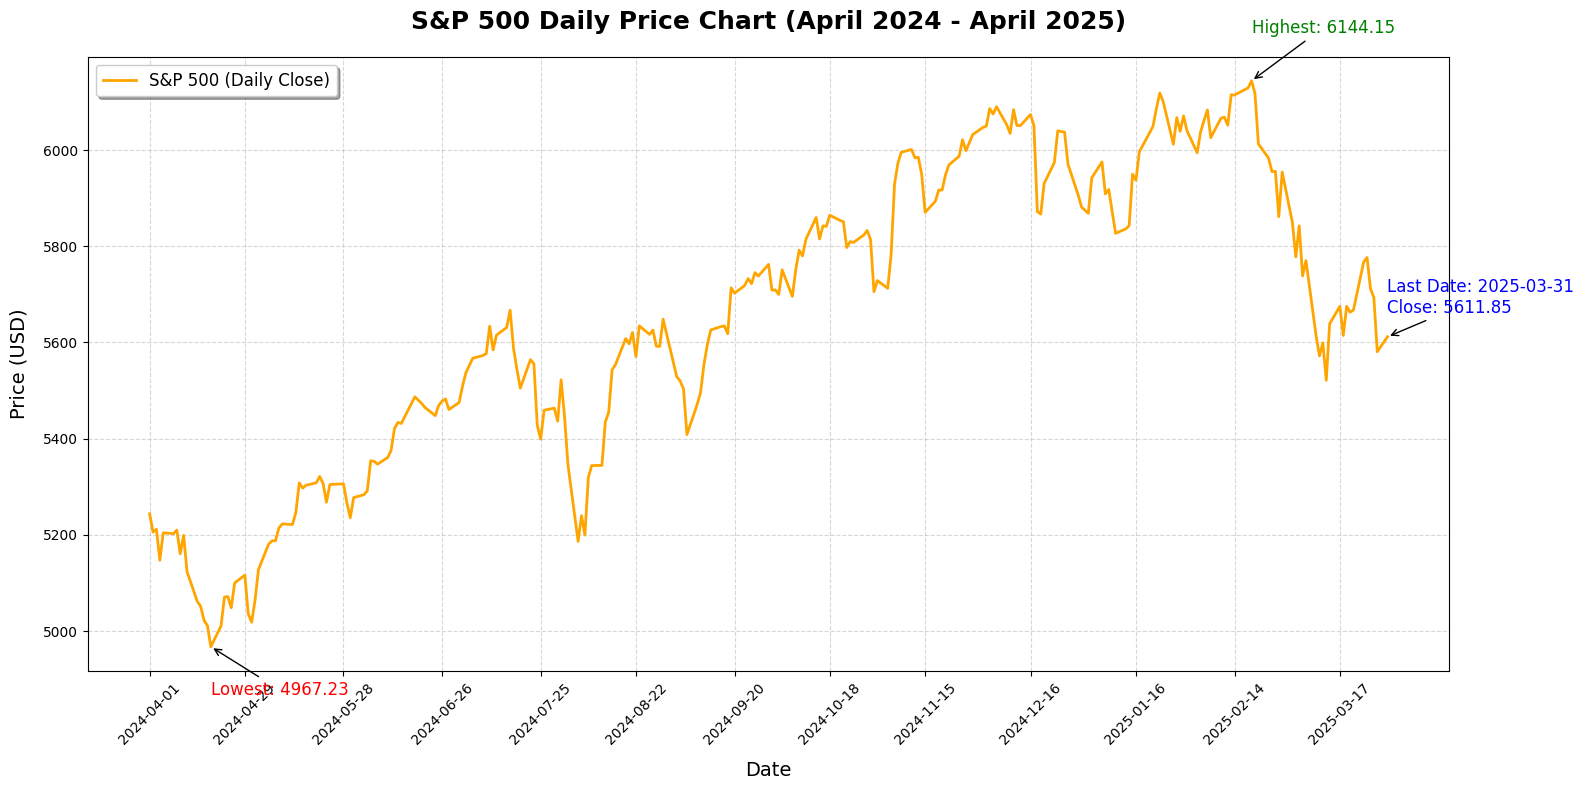

In [12]:
# Tạo biểu đồ
plt.figure(figsize=(16, 8))

# Thêm điểm dữ liệu gốc
plt.plot(data.index, data['Close'], color='orange', linewidth=2, label="S&P 500 (Daily Close)")

# Tiêu đề và nhãn
plt.title("S&P 500 Daily Price Chart (April 2024 - April 2025)", fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("Price (USD)", fontsize=14, labelpad=10)

# Lưới
plt.grid(True, linestyle='--', alpha=0.5)

# Chú thích
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

# Định dạng trục x
xticks = data.index
plt.xticks(xticks[::20], [x.strftime('%Y-%m-%d') for x in xticks[::20]], rotation=45, fontsize=10)

# Định dạng trục y
y_min, y_max = data['Close'].min(), data['Close'].max()
plt.ylim(y_min - 50, y_max + 50)

# Ghi chú điểm cao nhất và thấp nhất
max_close_date = data['Close'].idxmax()
min_close_date = data['Close'].idxmin()
plt.annotate(f"Highest: {data['Close'].max():.2f}",
			xy=(max_close_date, data['Close'].max()),
			xytext=(max_close_date, data['Close'].max() + 100),
			arrowprops=dict(facecolor='green', arrowstyle='->'),
			fontsize=12, color='green')

plt.annotate(f"Lowest: {data['Close'].min():.2f}",
			xy=(min_close_date, data['Close'].min()),
			xytext=(min_close_date, data['Close'].min() - 100),
			arrowprops=dict(facecolor='red', arrowstyle='->'),
			fontsize=12, color='red')

# Ghi chú ngày cuối cùng trong dữ liệu
last_date = data.index[-1]
last_close = data['Close'].iloc[-1]
plt.annotate(f"Last Date: {last_date.strftime('%Y-%m-%d')}\nClose: {last_close:.2f}",
			xy=(last_date, last_close),
			xytext=(last_date, last_close + 50),
			arrowprops=dict(facecolor='blue', arrowstyle='->'),
			fontsize=12, color='blue')

# Tối ưu hóa bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()